In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [246]:
dt = 0.5
def a(v0):
    return 2.8*math.exp(-0.01*v0)
def fe_v(v0):
    return v0 + a(v0) * dt
def fe_x(x0, v):
    return x0 + v * dt

In [247]:
def heun_v(v0):
    a_v0 = a(v0)
    return v0 + 0.5*(a(v0) + a(v0 + dt*a_v0)) * dt
def heun_x(x0, v0, v1):
    return x0 + 0.5*(v0 + v1) * dt

In [248]:
tmax = 50
t = np.arange(0, tmax, 0.5)
v = [25]
acc = [a(v[-1])]
x = [0]

In [249]:
for i in range(1, t.size):
    v_now = v[-1]
    v_new = fe_v(v_now)
    v.append(v_new)
    acc.append(a(v_new))
    x.append(fe_x(x[-1], v_now))

In [250]:
v_heun = [25]
acc_heun = [a(v_heun[-1])]
x_heun = [0]

In [251]:
for i in range(1, t.size):
    v_now = v_heun[-1]
    v_new = heun_v(v_now)
    v_heun.append(v_new)
    acc_heun.append(a(v_new))
    x_heun.append(heun_x(x_heun[-1], v_now, v_new))

In [164]:
print(v_heun)

[25, 26.08760209672274, 27.163439502717125]


In [252]:
print(len(v), t.size, len(acc), len(x))
print(len(v_heun), t.size, len(acc_heun), len(x_heun))

100 100 100 100
100 100 100 100


Text(35, 94, '(46, 94.7)')

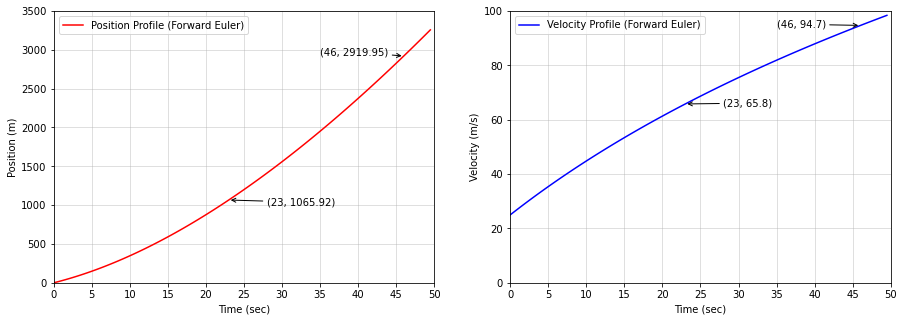

In [256]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey = False)

# add x-t diagram for vehicles A and B
vt = axs[1].plot(t, v, color = 'b', label = "Velocity Profile (Forward Euler)")
# at = ax.plot(t, acc, color = 'g', label = "Acceleration")
xt = axs[0].plot(t, x, color = 'r', label = "Position Profile (Forward Euler)")
# vb = ax.plot(vb[:, 0], vb[:, 1], color='m', label = "Vehicle B")

# ax.axhline(600, 0, 105, color='grey', alpha=0.3)
# ax.axhline(1200, 0, 105, color='grey', alpha=0.3)
# # view control
for i in range(axs.size):
    axs[i].set_xlabel("Time (sec)")
    axs[i].set_xticks(np.append(tmax, np.arange(0, tmax, 5)))
    axs[i].set_xlim([0, tmax])
    axs[i].grid(True,alpha=0.5)
    axs[i].legend(loc='upper left')
axs[0].set_ylabel("Position (m)")
axs[1].set_ylabel("Velocity (m/s)")

axs[0].set_ylim([0, 3500])
axs[1].set_ylim([0, 100])


# # Annotation
axs[0].annotate(text='(23, 1065.92)',xy=(23, 1065.92), xytext=(28, 1000),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[0].annotate(text='(46, 2919.95)',xy=(46, 2919.95), xytext=(35, 2935),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[1].annotate(text='(23, 65.8)',xy=(23, 65.8), xytext=(28, 65),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[1].annotate(text='(46, 94.7)',xy=(46, 94.7), xytext=(35, 94),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))

In [254]:
n1 = np.where(t == 23)[0].item(0)
n2 = np.where(t == 46)[0].item(0)
print(t[0], x[0], v[0], acc[0])
print(t[n1], x[n1], v[n1], acc[n1])
print(t[n2], x[n2], v[n2], acc[n2])


0.0 0 25 2.1806421925999335
23.0 1065.9196327946681 65.79809665117865 1.4501086007102213
46.0 2919.9497686594204 94.6592717549996 1.0865708192010537


Text(35, 94, '(46, 94.5)')

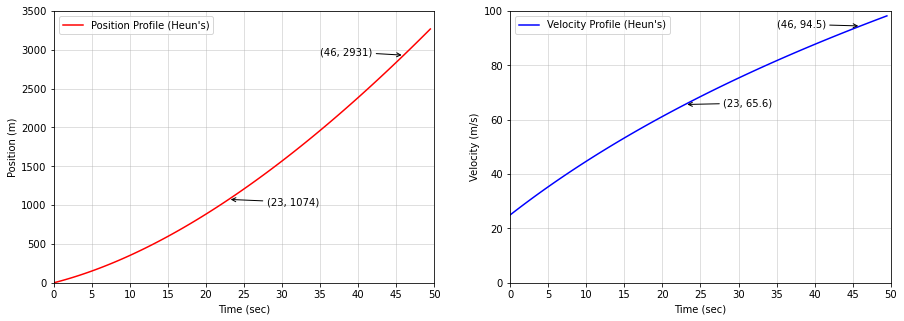

In [257]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey = False)

# add x-t diagram for vehicles A and B
vt = axs[1].plot(t, v_heun, color = 'b', label = "Velocity Profile (Heun's)")
# at = ax.plot(t, acc, color = 'g', label = "Acceleration")
xt = axs[0].plot(t, x_heun, color = 'r', label = "Position Profile (Heun's)")

# # view control
for i in range(axs.size):
    axs[i].set_xlabel("Time (sec)")
    axs[i].set_xticks(np.append(tmax, np.arange(0, tmax, 5)))
    axs[i].set_xlim([0, tmax])
    axs[i].grid(True,alpha=0.5)
    axs[i].legend(loc='upper left')
axs[0].set_ylabel("Position (m)")
axs[1].set_ylabel("Velocity (m/s)")

axs[0].set_ylim([0, 3500])
axs[1].set_ylim([0, 100])


# # Annotation
axs[0].annotate(text='(23, 1074)',xy=(23, 1074), xytext=(28, 1000),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[0].annotate(text='(46, 2931)',xy=(46, 2931), xytext=(35, 2935),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[1].annotate(text='(23, 65.6)',xy=(23, 65.6), xytext=(28, 65),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
axs[1].annotate(text='(46, 94.5)',xy=(46, 94.5), xytext=(35, 94),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))

In [239]:
print(t[0], x[0], v[0], acc_heun[0])
print(t[n1], x_heun[n1], v_heun[n1], acc_heun[n1])
print(t[n2], x_heun[n2], v_heun[n2], acc_heun[n2])


0.0 0 25 2.1806421925999335
23.0 1074.03635705588 65.64941754342132 1.4522662128010138
46.0 2931.289238987918 94.46912118725794 1.0886389053983667


Text(140, 4800, '(200, 4800)')

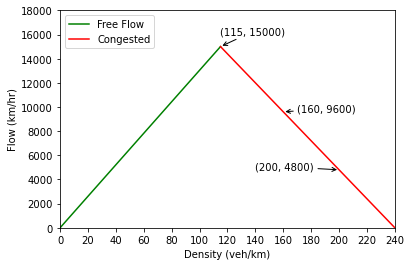

In [233]:
x1 = np.array([0, 115])
y1 = np.array([0, 15000])
x2 = np.array([115, 160, 200, 240])
y2 = np.array([15000, 9600, 4800, 0])
xmax = 240
fig, ax = plt.subplots()

# add x-t diagram for vehicles A and B
ukf = ax.plot(x1, y1, color = 'g', label = "Free Flow")
ukc = ax.plot(x2, y2, color = 'r', label = "Congested")

# view control
ax.set_xlabel("Density (veh/km)")
ax.set_ylabel("Flow (km/hr)")
ax.set_xticks(np.append(xmax, np.arange(0, xmax, 20)))
ax.set_xlim([0, xmax])
ax.set_ylim([0, 18000])

# plot decoration
leg = ax.legend(loc='upper left')

# Annotation
ax.annotate(text='(115, 15000)',xy=(115, 15000), xytext=(115, 16000),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text='(160, 9600)',xy=(160, 9600), xytext=(170, 9600),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text='(200, 4800)',xy=(200, 4800), xytext=(140, 4800),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))

Text(33, 3700, '(29.1, 4080)')

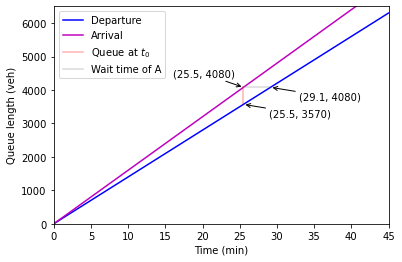

In [16]:
x = np.array([0, 45])
y1 = np.array([0, 6300])
y2 = np.array([0, 7200])
xmax = 45
fig, ax = plt.subplots()

# add x-t diagram for vehicles A and B
ukf = ax.plot(x, y1, color = 'b', label = "Departure")
ukc = ax.plot(x, y2, color = 'm', label = "Arrival")

ax.plot([25.5, 25.5], [3570, 4080], color='r', alpha=0.3, label = r'Queue at $t_0$')
ax.plot([25.5, 29.1], [4080, 4080], color='grey', alpha=0.3, label = "Wait time of A")

# view control
ax.set_xlabel("Time (min)")
ax.set_ylabel("Queue length (veh)")
ax.set_xticks(np.append(xmax, np.arange(0, xmax, 5)))
ax.set_xlim([0, xmax])
ax.set_ylim([0, 6500])

# plot decoration
leg = ax.legend(loc='upper left')

# Annotation
ax.annotate(text='(25.5, 3570)',xy=(25.5, 3570), xytext=(29, 3200),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text='(25.5, 4080)',xy=(25.5, 4080), xytext=(16, 4400),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text='(29.1, 4080)',xy=(29.14, 4080), xytext=(33, 3700),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))